<a href="https://colab.research.google.com/github/GabMer/Inteligencia-Artificial/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install MiniSom

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [ ]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

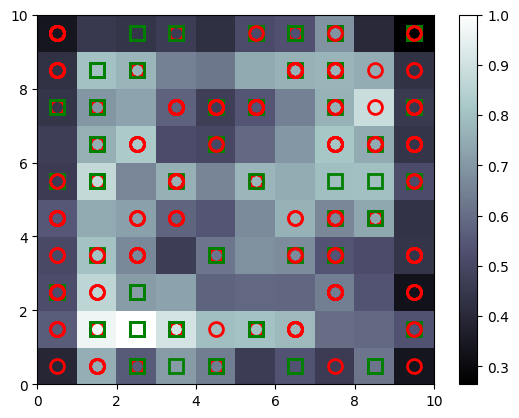

In [ ]:
from pylab import bone, pcolor, colorbar, plot
bone()
pcolor(som.distance_map().T)
colorbar()
marker = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+ 0.5,
         w[1] + 0.5,
         marker[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
plt.show()

In [ ]:
mappings = som.win_map(X)

mapped_6_8 = np.array(mappings.get((6, 8), []))
if mapped_6_8.ndim == 1 and mapped_6_8.size == 0:
    mapped_6_8 = mapped_6_8.reshape(0, X.shape[1]) # X.shape[1] is the input_len

mapped_5_1 = np.array(mappings.get((5, 1), []))
if mapped_5_1.ndim == 1 and mapped_5_1.size == 0:
    mapped_5_1 = mapped_5_1.reshape(0, X.shape[1]) # X.shape[1] is the input_len

frauds = np.concatenate((mapped_6_8, mapped_5_1), axis=0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15737627
15709459
15752139
15766906
15698271
15732884
15706637
15730673
15726167
15779492
15742297
15700549
15707042
15778589
15729377
15735221
15782089
15702030
15741633
15769980
15790254
15768600
15748552
15757467
15801441
15815443
15748432
15708714
15788131
15699963
15771856
15696287
15808023
15795079
15808386
15698749
15764841
15748649
15729718
15786539
15773776
15778345
15791769
15776494


In [ ]:
customers = dataset.iloc[:,1:].values

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [ ]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 100)

Epoch 1/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7053 - loss: 0.6500
Epoch 2/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9401 - loss: 0.3980
Epoch 3/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9357 - loss: 0.2911
Epoch 4/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9282 - loss: 0.2764  
Epoch 5/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9500 - loss: 0.1992  
Epoch 6/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9351 - loss: 0.2087
Epoch 7/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9196 - loss: 0.2300  
Epoch 8/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9382 - loss: 0.1925
Epoch 9/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.9377 - loss: 0.1745
Epoch 10/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9405 - loss: 0.1610
Epoch 11/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.9439 - loss: 0.1520
Epoch 12/100
690/690 ━━━━━━━━

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
print(y_pred)

[[1.55911070e+07 2.67101109e-28]
 [1.58007730e+07 6.75376254e-28]
 [1.55809140e+07 2.96332768e-27]
 ...
 [1.57574670e+07 6.48225248e-01]
 [1.57485520e+07 6.48225248e-01]
 [1.57686000e+07 6.48225248e-01]]


In [ ]:
new_customer_raw= np.array([15776156,22.08,11.460, 4,4,1.585,0,0,0,1,3,100,123, 0,0 ])
new_customer = sc.transform(new_customer_raw)
prob = ann.predict(new_customer) [0,0]
threshold = 0.5
label = int (prob >= threshold)
print(f"Ptobabilidad de fraude: {prob:.4f}")
print("Clasificacion:", "Fraude" if label == 1 else "No Fraude")

aprendizaje no supervisado
donde por proximidad detecta a su alrededor
